## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\liz20\OneDrive\Career Foundry\6. Advanced Analytics & Dashboard Design'

In [4]:
df = pd.read_csv(os.path.join(path,'Prepared Data', 'cleaned_merge_dataCounties.csv'))

## Data Cleaning

In [5]:
df.shape

(3132, 31)

In [6]:
df.describe()

,County_id,Total_Population,Pop_Density,Land_Area,Total_Households,Low_Income(<50000),Average_Income(50k-100k),High_Income(100k+),White_only,Black_only,...,Mixed_Race,Non-Hispanic,Hispanic,Total_Deaths,Total_Cases,People_of_Color,POC%,H%,LI%,HI%
count,3132.000000,3.132000e+03,3132.000000,3132.000000,3.132000e+03,3.132000e+03,3132.000000,3.132000e+03,3.132000e+03,3.132000e+03,...,3132.000000,3.132000e+03,3.132000e+03,3.132000e+03,3.132000e+03,3.132000e+03,3132.000000,3132.000000,3132.000000,3132.000000
mean,1569.339400,1.029673e+05,167.319442,1775.553913,3.817214e+04,1.608565e+04,11429.863985,1.065663e+04,7.493490e+04,1.301695e+04,...,3328.466475,8.460964e+04,1.835768e+04,1.255195e+04,4.312609e+05,2.803242e+04,16.836494,9.274739,49.752267,19.563633
std,906.282868,3.303746e+05,1120.897682,5716.200570,1.158536e+05,4.659384e+04,33345.517859,3.808444e+04,2.038348e+05,5.582788e+04,...,13189.364180,2.248533e+05,1.257403e+05,6.814532e+04,1.680515e+06,1.381698e+05,16.701968,13.808635,10.524478,8.732829
min,0.000000,1.020000e+02,0.023113,3.293424,3.300000e+01,0.000000e+00,0.000000,8.000000e+00,9.900000e+01,0.000000e+00,...,0.000000,7.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,3.800000
25%,784.750000,1.101225e+04,10.482087,693.870616,4.297000e+03,2.223250e+03,1275.750000,6.575000e+02,9.015750e+03,1.107500e+02,...,168.000000,9.977250e+03,3.337500e+02,3.847500e+02,3.094225e+04,7.827500e+02,4.900000,2.112035,43.300000,13.700000
50%,1569.500000,2.578900e+04,27.884471,991.408318,9.921500e+03,5.199500e+03,2990.500000,1.660000e+03,2.194000e+04,8.085000e+02,...,494.000000,2.396750e+04,1.051000e+03,1.410000e+03,8.669050e+04,3.051500e+03,10.300000,4.101046,50.100000,17.800000
75%,2354.250000,6.737100e+04,72.648685,1484.943979,2.603525e+04,1.259000e+04,8138.500000,5.358250e+03,5.802925e+04,5.591000e+03,...,1744.500000,6.304250e+04,5.009250e+03,4.964750e+03,2.433118e+05,1.110550e+04,23.300000,9.561293,56.925000,23.000000
max,3139.000000,1.009805e+07,44771.554750,234280.622000,3.306109e+06,1.326414e+06,931404.000000,1.048291e+06,5.186859e+06,1.230494e+06,...,397680.000000,5.204449e+06,4.893603e+06,1.689384e+06,4.763266e+07,4.911193e+06,90.600000,99.068770,81.800000,100.000000


In [7]:
df.head()

,County_id,County,State,geometry,Total_Population,Pop_Density,Land_Area,Total_Households,Low_Income(<50000),Average_Income(50k-100k),...,Total_Cases,People_of_Color,POC%,H%,LI%,HI%,High_High-Income,High_Low-Income,Pop_density_size,Hispanic_Representation
0,0,Lake of the Woods,Minnesota,POLYGON ((-95.34283129273595 48.54667929356955...,3809,1.823648,2088.670821,1585,832,554,...,5531,263,6.9,1.680231,52.5,12.6,No,Yes,Small,Hispanics Not Proportionatley Represented
1,1,Ferry,Washington,POLYGON ((-118.8516287983006 47.94956367346894...,7576,2.136633,3545.766247,3097,1821,823,...,5529,1821,24.0,4.580253,58.8,14.6,No,Yes,Small,Hispanics Not Proportionatley Represented
2,2,Stevens,Washington,POLYGON ((-117.4388315800717 48.04411550564895...,44214,11.089515,3987.009440,17433,8856,5653,...,39859,4951,11.2,3.627810,50.8,16.8,No,Yes,Small,Hispanics Not Proportionatley Represented
3,3,Okanogan,Washington,"POLYGON ((-118.9720938501714 47.9391520192553,...",41638,4.912973,8475.112760,17527,9698,5215,...,156468,11215,26.9,19.719967,55.3,14.9,No,Yes,Small,Hispanics Proportionatley Represented
4,4,Pend Oreille,Washington,POLYGON ((-117.4385804126227 48.99991850566833...,13219,5.866061,2253.471152,5782,2980,1852,...,16541,1338,10.1,3.653832,51.5,16.4,No,Yes,Small,Hispanics Not Proportionatley Represented


In [8]:
df.columns

Index(['County_id', 'County', 'State', 'geometry', 'Total_Population',
       'Pop_Density', 'Land_Area', 'Total_Households', 'Low_Income(<50000)',
       'Average_Income(50k-100k)', 'High_Income(100k+)', 'White_only',
       'Black_only', 'Native_American_only', 'Asian_only',
       'Pacific_Islander_only', 'Other_Race_only', 'Mixed_Race',
       'Non-Hispanic', 'Hispanic', 'Total_Deaths', 'Total_Cases',
       'People_of_Color', 'POC%', 'H%', 'LI%', 'HI%', 'High_High-Income',
       'High_Low-Income', 'Pop_density_size', 'Hispanic_Representation'],
      dtype='object')

In [9]:
df.drop(columns='Unnamed: 0')

KeyError: "['Unnamed: 0'] not found in axis"

In [10]:
#chck for null values
df.isnull().sum()

County_id                   0
County                      0
State                       0
geometry                    0
Total_Population            0
Pop_Density                 0
Land_Area                   0
Total_Households            0
Low_Income(<50000)          0
Average_Income(50k-100k)    0
High_Income(100k+)          0
White_only                  0
Black_only                  0
Native_American_only        0
Asian_only                  0
Pacific_Islander_only       0
Other_Race_only             0
Mixed_Race                  0
Non-Hispanic                0
Hispanic                    0
Total_Deaths                0
Total_Cases                 0
People_of_Color             0
POC%                        0
H%                          0
LI%                         0
HI%                         0
High_High-Income            0
High_Low-Income             0
Pop_density_size            0
Hispanic_Representation     0
dtype: int64

In [11]:
#check for duplicates
dups = df.duplicated()
dups.shape # No dups

(3132,)

C:\Users\liz20\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Cases', ylabel='Density'>

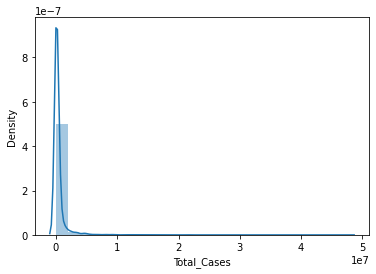

In [12]:
#check for extreme values
sns.distplot(df['Total_Cases'], bins=25)

In [13]:
# Check the mean
df['Total_Cases'].mean()

431260.85089399747

In [14]:
# Check the median
df['Total_Cases'].median()

86690.5

In [15]:
# Check the max
df['Total_Cases'].max()

47632661

## Data Prep for Regression Analysis

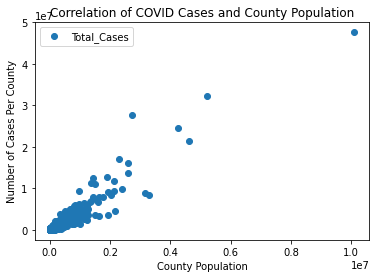

In [16]:
# Create a scatterplot using matplotlib
df.plot(x = 'Total_Population', y='Total_Cases',style='o')
plt.title('Correlation of COVID Cases and County Population')  
plt.ylabel('Number of Cases Per County')  
plt.xlabel('County Population')  
plt.show()

Hypothesis: As the population of a county increases, then the number of COVID cases will also increase.

In [17]:
# Reshape the variables 

X = df['Total_Population'].values.reshape(-1,1)
y = df['Total_Cases'].values.reshape(-1,1)

In [18]:
X

array([[ 3809],
       [ 7576],
       [44214],
       ...,
       [ 6474],
       [ 3425],
       [ 5750]], dtype=int64)

In [19]:
y

array([[ 5531],
       [ 5529],
       [39859],
       ...,
       [ 4437],
       [  866],
       [ 1082]], dtype=int64)

In [20]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [21]:
# Create a regression object.

regression = LinearRegression() 

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)


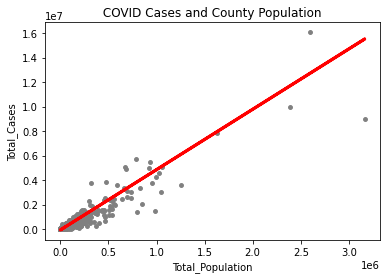

In [52]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title(' COVID Cases and County Population ')
plot_test.xlabel('Total_Population')
plot_test.ylabel('Total_Cases')
plot_test.show()

The line does not appear to fit the data very well. Extreme values may be impacting the line of best fit.

In [25]:
#Summary statistics objects

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.92224932]]
Mean squared error:  162771301417.3042
R2 score:  0.8303798550117396


In [27]:
y_predicted

array([[ 1.83882404e+04],
       [ 1.09370283e+06],
       [ 7.63060573e+05],
       [ 1.02369956e+04],
       [-4.92533097e+04],
       [ 1.56536090e+05],
       [ 8.51979305e+04],
       [-3.30148092e+04],
       [ 9.98366999e+04],
       [ 7.02768902e+03],
       [ 1.16656262e+07],
       [ 7.12630426e+04],
       [ 1.05155853e+06],
       [ 3.47153414e+04],
       [ 1.26830315e+05],
       [-5.42789263e+04],
       [ 2.60142225e+06],
       [ 1.03951700e+05],
       [ 4.28075193e+04],
       [ 8.33773607e+05],
       [ 1.20948227e+05],
       [ 4.41554014e+05],
       [ 1.06061643e+04],
       [ 3.40213043e+04],
       [ 1.97172478e+04],
       [-5.83693155e+04],
       [ 3.47977133e+05],
       [ 2.12382228e+04],
       [ 2.18273080e+06],
       [ 1.50732758e+05],
       [ 1.58582043e+04],
       [-2.29881873e+04],
       [-5.15076999e+04],
       [-2.46174519e+04],
       [ 9.56626325e+04],
       [ 3.89934386e+05],
       [-1.22773728e+04],
       [ 1.53528596e+05],
       [-4.2

In [28]:
#actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,49084,1.838824e+04
1,888176,1.093703e+06
2,853854,7.630606e+05
3,119283,1.023700e+04
4,14662,-4.925331e+04
5,176020,1.565361e+05
6,41283,8.519793e+04
7,17112,-3.301481e+04
8,133108,9.983670e+04
9,61211,7.027689e+03


In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.92224932]]
Mean squared error:  349192341512.58966
R2 score:  0.9034980137161143


The model given from the training set gave an R2 of 0.163 rather than the -1.3 given from the test model. This is due to the non-linear nature of our function.

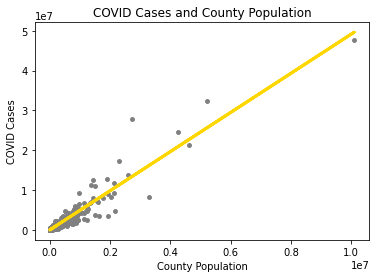

In [57]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='gold', linewidth =3)
plot_test.title('COVID Cases and County Population')
plot_test.xlabel('County Population')
plot_test.ylabel('COVID Cases')
plot_test.show()

I first tested the correlation between COVID cases and county population density. This data was non-linear and so we now are looking to see what amount of variablility in COVID cases is due to the county population. With an R2 of 0.83, only 18% of COVID case variability is due to factors other than population.

## Removing Outliers

In [33]:
# Removing extreme outliers, cases >10788462
df_test = df[df['Total_Cases'] <=10788462] 

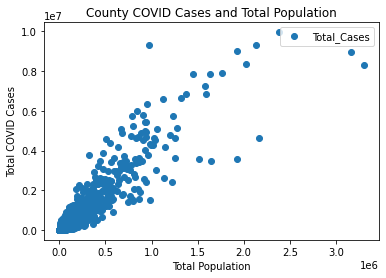

In [34]:
# See how the scatterplot looks without outliers.

df_test.plot(x ='Total_Population' , y='Total_Cases', style='o')  
plt.title('County COVID Cases and Total Population')  
plt.xlabel('Total Population')  
plt.ylabel('Total COVID Cases')  
plt.show()

In [35]:
# Reshape again.

X_2 = df_test['Total_Population'].values.reshape(-1,1)
y_2 = df_test['Total_Cases'].values.reshape(-1,1)

In [36]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [37]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [38]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [39]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2_2 = r2_score(y_test_2, y_predicted_2)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2_2)

Slope: [[3.87095332]]
Mean squared error:  124651877705.1307
R2 score:  0.8667245365424713


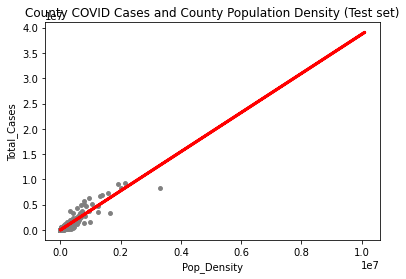

In [41]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('County COVID Cases and County Population Density (Test set)')
plot_test.xlabel('Pop_Density')
plot_test.ylabel('Total_Cases')
plot_test.show()

In [42]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,151970,1.870198e+05
1,133108,1.341697e+05
2,183637,1.110988e+05
3,221950,1.652573e+05
4,88723,4.662031e+04
5,103957,8.082018e+04
6,8316713,1.278926e+07
7,1092032,1.318128e+06
8,549086,3.793249e+05
9,284726,2.294841e+05


In [43]:
# How does the regression fit the training set?

y_predicted_train_2 = regression.predict(X_train_2)

In [44]:
rmse_2 = mean_squared_error(y_train_2, y_predicted_train_2)
r2_22 = r2_score(y_train_2, y_predicted_train_2)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_22)

Slope: [[3.87095332]]
Mean squared error:  111371634128.78261
R2 score:  0.8463662458354235


Eliminating extreme values does slightly increase the R2 but the increase does not justify eliminating values that are not certainly outliers.